#<h5 align="center"><i></i></h5>
<font color="D59F0F" face="Comic Sans MS, Arial"><h1 align="center">
El Descenso del Gradiente</h1></font>


En estas notas discutimos el concepto de gradiente y algunas de sus propiedades. Motivados por dicha discusión, presentamos el <i>descenso del gradiente</i>, un algoritmo cuyas variantes son ampliamente utilizadas para entrenar modelos de aprendizaje de máquina.

###<font color="002B7A" face="Comic Sans MS, Arial">Bibliotecas</font>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets
import time

plt.rcParams.update({'text.usetex':True})
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


#<font color="002B7A" face="Comic Sans MS, Arial">El Gradiente</font>

El gradiente de una función $f:\mathbb{R}^d\to\mathbb{R}$ es el vector de derivadas parciales dado por
$$
\nabla f(\left.x_{1}, x_{2}, \ldots, x_{d}\right)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(\left.x_{1}, x_{2}, \ldots, x_{d}\right)\\
\dfrac{\partial f}{\partial x_2}(\left.x_{1}, x_{2}, \ldots, x_{d}\right) \\
\vdots \\
\dfrac{\partial f}{\partial x_d}(\left.x_{1}, x_{2}, \ldots, x_{d}\right)
\end{array}\right].
$$

Geométricamente, éste indica hacia qué dirección crece más la función.

<b>Ejemplo.</b> Considere la función $f(x,y)=\dfrac{x^2-xy+y^2-15000}{2}$, la cual se muestra a continuación.

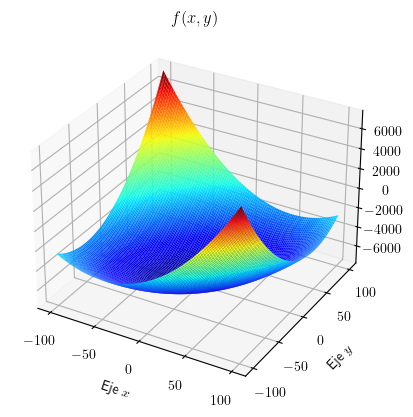

In [47]:
def f(x, y):
    """
    Función f(x, y) que calcula el valor de la función en un punto (x, y).

    Parámetros:
    x (float): Valor de la variable x.
    y (float): Valor de la variable y.

    Retorna:
    float: Valor de la función en el punto (x, y).
    """
    return (x**2 - x * y + y**2 - 15000) / 2

# Generar valores de x e y para crear una malla de puntos
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

# Crear una malla 2D de puntos X, Y
X, Y = np.meshgrid(x, y)

# Calcular los valores de Z usando la función f(x, y) en cada punto de la malla
Z = f(X, Y)

# Crear una figura y un conjunto de ejes 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# Crear una superficie tridimensional a partir de los datos de X, Y, Z
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')

# Configuración adicional del gráfico
plt.title('$f(x,y)$')
plt.xlabel('Eje $x$')
plt.ylabel('Eje $y$')

# Mostrar el gráfico
plt.show()

Se puede mostrar que el mínimo de esta función está en $(0,0)$ y que su gradiente está dado por
$$
\nabla f \left( x, y \right)
= \left[\begin{array}{c}
x-\dfrac{y}{2}\\
y-\dfrac{x}{2}
\end{array}\right].
$$

En particular, el gradiente en el punto $(40,-10)$ está dado por
$\nabla f(40,-10) = \left[\begin{array}{c}45\\-30\end{array}\right]$, tal y como se ilustra en la figura.

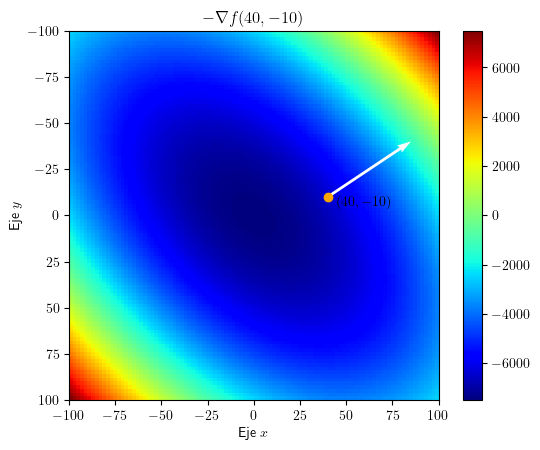

In [56]:
def grad_f(x, y):
    """
    Calcula el gradiente de la función f(x, y) en un punto (x, y).

    Parámetros:
    x (float): Valor de la variable x.
    y (float): Valor de la variable y.

    Retorna:
    tuple: Una tupla que contiene las componentes del vector gradiente (fx, fy).
    """
    fx = x - y / 2
    fy = y - x / 2
    return fx, fy

# Definir el punto donde se calculará el gradiente
v = (40, -10)

# Calcular el gradiente en el punto v
grad_v = grad_f(v[0], v[1])

# Crear el gráfico
plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
plt.colorbar()

# Marcar el punto v en el gráfico
plt.scatter(v[0], v[1], c='orange', zorder=2)
plt.annotate('$'+str(v)+'$', v+np.array([5,5]))

# Dibujar el vector gradiente en el punto v
plt.quiver(v[0], v[1], grad_v[0], grad_v[1], scale_units='xy', angles='xy', scale=1, color='white')

# Configuración adicional del gráfico
plt.title(r'$-\nabla f'+str(v)+'$')
plt.xlabel('Eje $x$')
plt.ylabel('Eje $y$')

# Mostrar el gráfico
plt.show()

Puesto que el vector gradiente apunta hacia donde la función crece, en la dirección contraria al gradiente la función decrece.

#<font color="002B7A" face="Comic Sans MS, Arial">El  Descenso del Gradiente</font>


Motivados por la discusión anterior, una forma natural de encontrar el valor mínimo de la función $f$ es seguir la dirección contraria al gradiente de manera iterativa. Específicamente, se define el descenso del gradiente de la siguiente manera.

&nbsp;

---

<font face="Comic Sans MS, Arial"><font color="002B7A"> Descenso del Gradiente$(\omega_0,T,\eta)$</font></font>

---

Parámetros: punto inicial $\omega_0\in\mathbb{R}^{d}$; tamaño de paso $\eta>0$; número de iteraciones $T\in\mathbb{N}$

1. Para $t = 0,1,2,...,T-1$
2. &nbsp;&nbsp;&nbsp; $w_{t+1}=w_t-\eta\nabla f(w_t)$
3. Regresar $\omega=(\omega_0,\ldots,\omega_T)$

&nbsp;

El punto inicial $w_{0}$ constituye, como su nombre lo indica, el punto donde el descendo del gradiente inicia. Después, durante $T$ iteraciones, el algoritmo sigue la dirección opuesta al gradiente. El parámetro $\eta$ es conocido como tamaño de paso o _learning rate_, y módula la magnitud del avance en cada iteración.

<b>Observación.</b> Para funciones sencillas (e.g., convexas), el punto inicial es inmaterial. En notas subsecuentes discutimos el rol de $w_{0}$ en funciones más complejas. El número de iteraciones $T$ típicamente es tan grande como el poder de cómputo disponible lo permita.

<b>Ejemplo.</b> Retomando el ejemplo anterior, con $f(x,y)=\dfrac{x^2-xy+y^2-15000}{2}$, iteremos el descenso del gradiente con $w_0=(40,-10)$ y $T=25$. El valor de $\eta$ es manipulable utilizando la barra interactiva.

In [62]:
def descenso_gradiente_f(w0, T, eta):
    """
    Realiza el descenso de gradiente para la función f(x, y).

    Parámetros:
    w0 (tuple): Punto inicial (x, y) como una tupla.
    T (int): Número de iteraciones.
    eta (float): Tasa de aprendizaje.

    Retorna:
    list: Lista de puntos en el descenso de gradiente.
    """
    wt = np.array(w0)
    w = []
    w.append(wt)

    # Realizar el descenso de gradiente
    for t in range(T):
        grad_wt = np.array(grad_f(wt[0], wt[1]))
        wt = wt - eta * grad_wt
        w.append(wt)

    # Graficar la función
    plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
    plt.colorbar()

    # Graficar el descenso de gradiente
    plt.scatter(w0[0], w0[1], c='orange',marker="o", zorder=3)
    plt.annotate(str(w0), w0+np.array([5,5]))
    wx=np.array([t[0] for t in w])
    wy=np.array([t[1] for t in w])
    plt.quiver(wx[:-1],wy[:-1],wx[1:]-wx[:-1],wy[1:]-wy[:-1], scale_units='xy', angles='xy', scale=1, color='white', width=0.005, zorder=2)
    plt.scatter(w[-1][0],w[-1][1],color="black",marker="^", zorder=3)

    # Configuración adicional del gráfico
    plt.title('Descenso del Gradiente para $f$ con $w_{0}='+str(w0)+'$, $T='+str(T)+'$ y $\eta='+str(eta)+'$ \n\n Punto final: $('+str(f"{w[-1][0]:.3f}")+','+str(f"{w[-1][1]:.3f}")+')$ \n')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.scatter(0,0,color="red",marker='X')
    plt.legend(['punto inicial','descenso del gradiente','punto final','punto mínimo'],loc='best', bbox_to_anchor=(0.3, -0.65, 0.5, 0.5),facecolor='gray')
    plt.show()

    return w

# Crear un control deslizante para ajustar el tamaño del paso (tasa de aprendizaje)
eta_slider = widgets.FloatSlider(value=0.5, min=0.05, max=1.4, step=0.05, description='η')

# Definir la función de visualización interactiva
@interact(eta=eta_slider)
def visualize_normalized_gradient_descent(eta):
  w = descenso_gradiente_f((40, -10), 25, eta)

interactive(children=(FloatSlider(value=0.5, description='η', max=1.4, min=0.05, step=0.05), Output()), _dom_c…

<b>Observación.</b> A partir del ejemplo anterior podemos observar lo siguiente.
- Si $\eta$ es muy pequeño, e.g., $\eta=0.05$, el parámetro final $W_{T}$ no se acerca lo suficiente al mínimo.
- Si $\eta$ es muy grande, e.g., $\eta=1.35$, la trayectoria del descenso del gradiente se aleja más en cada paso.
- Si $\eta$ está en un intervalo adecuado, e.g., $[0.35,0.60]$, la trayectoria del descenso del gradiente se acerca *suavemente* al mínimo.

Por lo tanto, concluimos que la selección del tamaño de paso es crucial para el buen funcionamiento del descenso del gradiente. En notas subsecuentes discutimos con más detalle este problema para metodologías de aprendizaje de máquina específicas.

#<font color="002B7A" face="Comic Sans MS, Arial">Conclusiones</font>

En estas notas discutimos el concepto de gradiente y presentamos el descenso del gradiente, un algoritmo iterativo para minimizar funciones. Además, mostramos que la selección del tamaño de paso es crucial para el buen funcionamiento de este algoritmo.